In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 


In [33]:
#%pip install statsmodels
#%pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.1 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 28.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 26.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
data = pd.read_csv('gapminder.csv').dropna()
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [21]:
continent = pd.get_dummies(data['continent'],drop_first=True).astype(int) #creating dataframe with dummy variables for continent col
                                                                          # remove one dummy col to account for colinearity (only need 4 variables to predict which cont. its in)
data = pd.concat([data,continent], axis=1) #adding continent dataframe to data

data.head()


,country,continent,year,lifeExp,pop,gdpPercap,Americas,Asia,Europe,Oceania
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,1,0,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,1,0,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,1,0,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,1,0,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,1,0,0


In [22]:
inputs = ['pop','gdpPercap','year','Americas','Asia','Europe','Oceania']
data[inputs].corr() #correlation matrix

,pop,gdpPercap,year,Americas,Asia,Europe,Oceania
pop,1.000000,-0.025600,8.230808e-02,-2.219817e-02,2.459466e-01,-6.062454e-02,-2.334280e-02
gdpPercap,-0.025600,1.000000,2.273181e-01,-3.715837e-03,3.834877e-02,3.809787e-01,1.383432e-01
year,0.082308,0.227318,1.000000e+00,-1.017585e-15,1.403744e-15,2.457989e-15,-4.387178e-15
Americas,-0.022198,-0.003716,-1.017585e-15,1.000000e+00,-2.543436e-01,-2.392372e-01,-5.524946e-02
Asia,0.245947,0.038349,1.403744e-15,-2.543436e-01,1.000000e+00,-2.847707e-01,-6.576498e-02
Europe,-0.060625,0.380979,2.457989e-15,-2.392372e-01,-2.847707e-01,1.000000e+00,-6.185896e-02
Oceania,-0.023343,0.138343,-4.387178e-15,-5.524946e-02,-6.576498e-02,-6.185896e-02,1.000000e+00


In [39]:
train,test = train_test_split(data,test_size=0.3,random_state=2024) #partitioning data 
model = sm.OLS(train['lifeExp'],train[inputs]).fit()


Text(0, 0.5, 'actual')

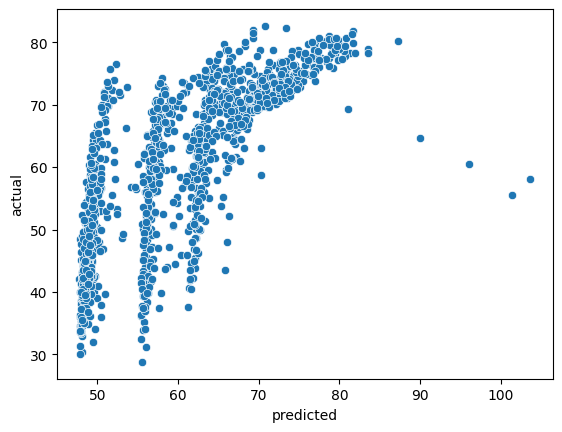

In [41]:
sns.scatterplot(y=train['lifeExp'],x=model.predict(train[inputs]))
plt.xlabel('predicted')
plt.ylabel('actual')


<Axes: xlabel='None', ylabel='None'>

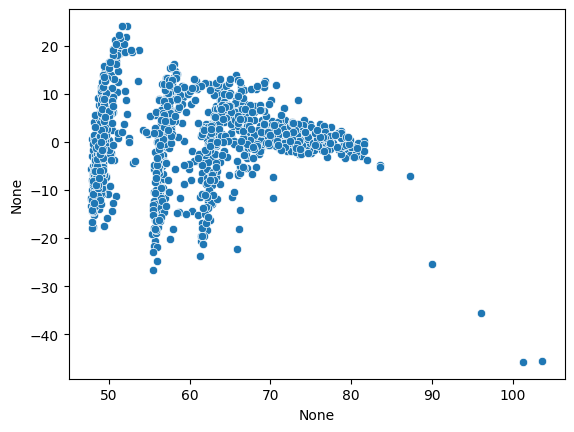

In [43]:
residuals = train['lifeExp'] - model.predict(train[inputs]) # calculating residuals
sns.scatterplot(y=residuals,x=model.predict(train[inputs]))

<Axes: xlabel='gdpPercap', ylabel='None'>

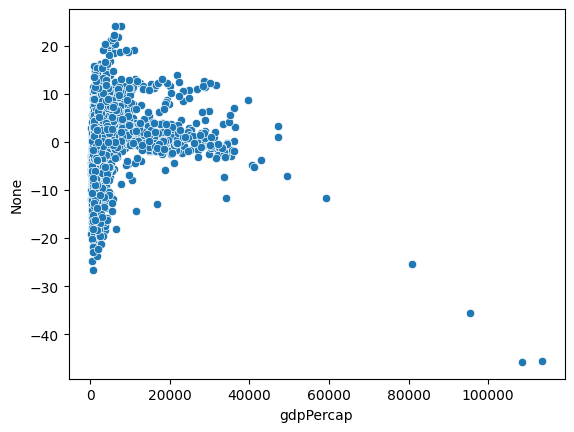

In [44]:
residuals = train['lifeExp'] - model.predict(train[inputs]) # calculating residuals
sns.scatterplot(y=residuals,x=train['gdpPercap'])

Text(0.5, 0, 'log(gdpPercap)')

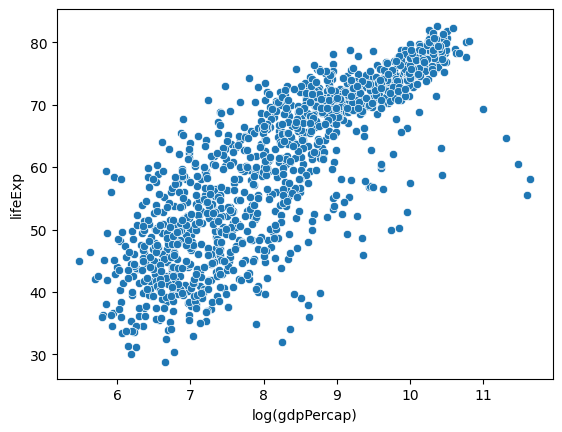

In [49]:
sns.scatterplot(y=train['lifeExp'],x=np.log(train['gdpPercap']))
plt.xlabel('log(gdpPercap)')

In [ ]:
data['gdpPercap'] = np.log(data['gdpPercap'])
data['pop'] = np.log(data['pop'])

data['year'] = data['year'] - 1952

In [57]:
train,test = train_test_split(data,test_size=0.3,random_state=2024)

model = sm.OLS(train['lifeExp'], train[inputs]).fit()

<Axes: xlabel='None', ylabel='None'>

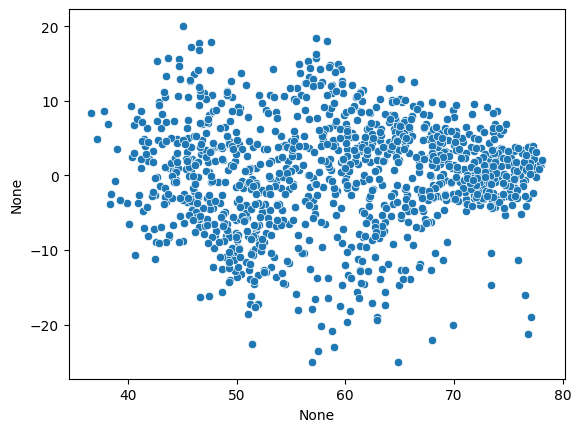

In [58]:
residuals = train['lifeExp'] - model.predict(train[inputs]) # calculating residuals
sns.scatterplot(y=residuals,x=model.predict(train[inputs]))

In [59]:
from sklearn.metrics import mean_absolute_error

In [62]:
print(mean_absolute_error(y_true = train['lifeExp'],y_pred=model.predict(train[inputs])))
print(mean_absolute_error(y_true = test['lifeExp'],y_pred=model.predict(test[inputs])))


5.538538003240596
5.685224903993943


In [65]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                lifeExp   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.208e+04
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                        0.00
Time:                        17:57:08   Log-Likelihood:                         -4037.5
No. Observations:                1192   AIC:                                      8089.
Df Residuals:                    1185   BIC:                                      8125.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------